# Entrenando y eligiendo modelo de ML para predecir precios de casas

In [395]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de estadística
from scipy import stats
import statsmodels.api as sm

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


## Exploración del dataset

In [340]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [298]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [299]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [300]:
df["view"].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [301]:
df["view"].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [302]:
df["waterfront"].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [303]:
df["condition"].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [304]:
df["price"].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

C:\Users\Ale y Ali\miniconda3\envs\housesML\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


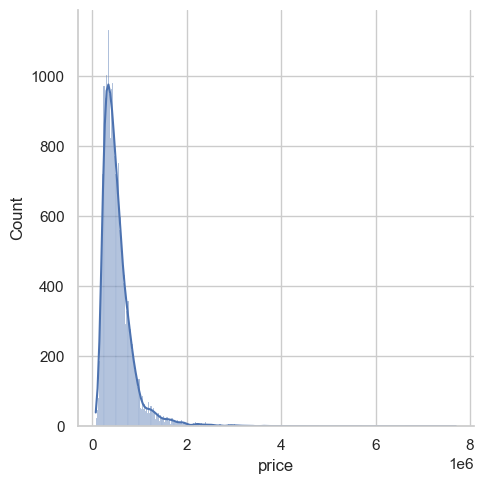

In [346]:
sns.displot(data=df, x="price", kde=True)

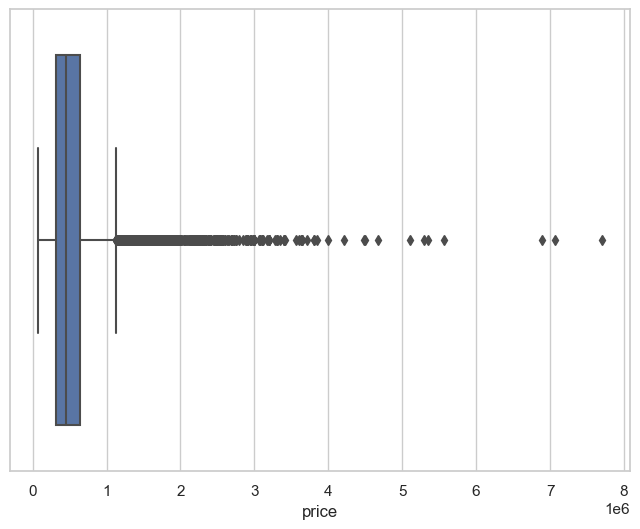

In [344]:
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df["price"])
plt.show()

In [307]:
mean = df["price"].mean()
std = df["price"].std()

threshold = 3 * std

outliers = df[abs(df["price"] - mean) > threshold]

print("Valores atípicos:")
print(outliers)

Valores atípicos:
               id             date      price  bedrooms  bathrooms  \
21     2524049179  20140826T000000  2000000.0         3       2.75   
153    7855801670  20150401T000000  2250000.0         4       3.25   
246    2025069065  20140929T000000  2400000.0         4       2.50   
269    7960900060  20150504T000000  2900000.0         4       3.25   
282    7424700045  20150513T000000  2050000.0         5       3.00   
...           ...              ...        ...       ...        ...   
21514  3262300818  20150227T000000  1865000.0         4       3.75   
21530  8964800330  20150407T000000  3000000.0         4       3.75   
21540   715010530  20150113T000000  1881580.0         5       3.50   
21568   524059330  20150130T000000  1700000.0         4       3.50   
21576  9253900271  20150107T000000  3567000.0         5       4.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21            3050     44867     1.0           0     4  ...      9   
1

In [308]:
p_df = df.drop(columns=["id", "date"])
p_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


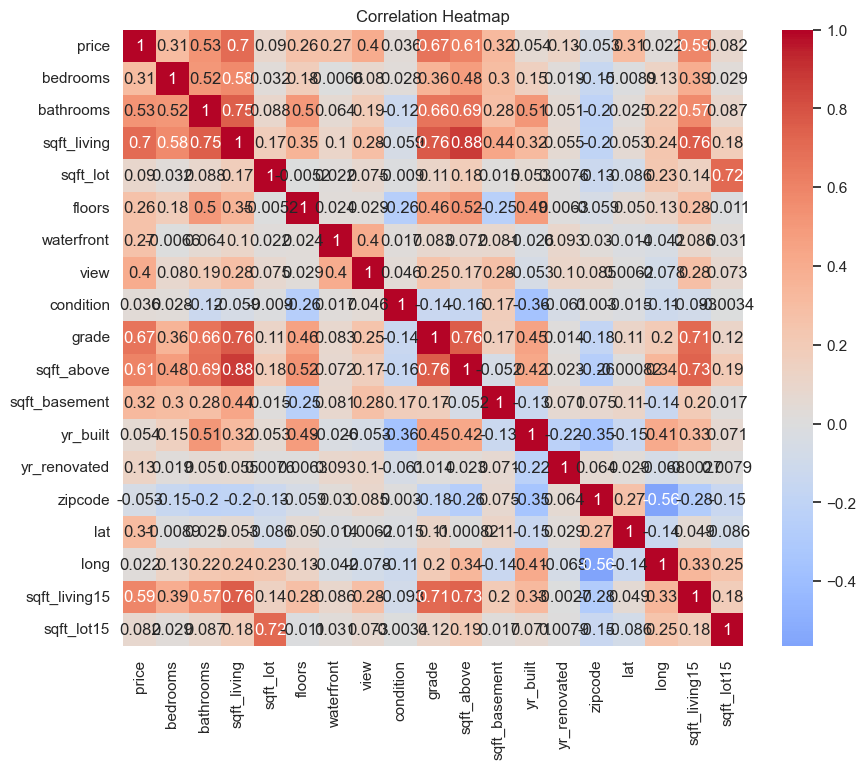

In [266]:
correlation_matrix = p_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


## Manipulación de datos

In [348]:
df = df.drop(index=outliers.index)

In [349]:
df.drop(columns=["id", "date"], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [354]:
nf = [col for col in df.columns if col not in ['id', 'date']]
features = nf

df1 = df.copy()

for i in features:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819



Inference:
Before removal of outliers, The dataset had 21207 samples.
After removal of outliers, The dataset now has 13834 samples.


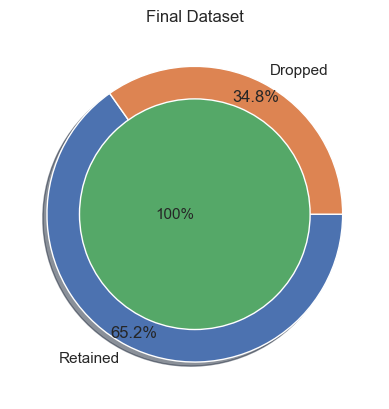


Inference: After the cleanup process, 7373 samples were dropped, while retaining 65.23% of the data.


In [355]:
ndf = df1.copy()
ndf.columns=[i.replace('-','_') for i in ndf.columns]

plt.title('Final Dataset')
plt.pie([ndf.shape[0], df.shape[0]-ndf.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([ndf.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {df.shape[0] - ndf.shape[0]} samples were dropped, \
while retaining {round((ndf.shape[0] * 100 / df.shape[0]), 2)}% of the data.')

## Entrenamiento del modelo

In [360]:
model = LinearRegression()

model = model.fit(X_train, y_train)

In [370]:
y = df["price"]
X = df.drop(columns=["price"])

In [371]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [361]:
def pred(model, data_to_pred):
    y_pred = model.predict(data_to_pred)
    y_pred = np.rint(y_pred)
    return y_pred

In [408]:
def test(y_pred, y_true):
    train_mae = mean_absolute_error(y_true, y_pred)
    train_mse = mean_squared_error(y_true, y_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_true, y_pred)
    
    
    print(f"MAE: {train_mae}")
    print(f"MSE: {train_mse}")
    print(f"RMSE: {train_rmse}")
    print(f"R2: {train_r2}")

In [409]:
def pred_test(model, data_to_pred, y_true):
    y_pred = pred(model, data_to_pred)
    test(y_true, y_pred)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [411]:
model = LinearRegression()
model = model.fit(X_train, y_train)
pred_test(model, X_train, y_train)

MAE: 87239.55742296918
MSE: 13461495760.685823
RMSE: 116023.68620538576
R2: 0.18464264060287172


## KNN

In [376]:
knn_model = KNeighborsRegressor(n_neighbors=4)  
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)


m_s_e = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio:", m_s_e)

Error cuadrado medio: 14220484565.01276


## SVM

In [378]:
svm_model = SVR(kernel="poly", degree=3)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

m_s_e = mean_squared_error(y_test, y_pred)
print("Error cuadrado medio:", m_s_e)

Error cuadrado medio: 67004918472.98876


## Random Forest

In [393]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


m_s_e = mean_squared_error(y_test, y_pred)
m_a_e = mae(y_test, y_pred)
rmse = np.sqrt(m_s_e)
r2 = r2_score(y_test, y_pred)

print("Error cuadrado medio:", m_s_e)
print("Coeficiente de determinación (R2):", r2)
print("Error raíz del cuadrado medio:", rmse)
print("Error absoluto medio (MAE):", m_a_e)

Error cuadrado medio: 9373388690.484173
Coeficiente de determinación (R2): 0.8593156543471607
Error raíz del cuadrado medio: 96816.26253106537
Error absoluto medio (MAE): 62231.57321562156


# Comparación de los modelos

In [397]:
results = []

# Definir los modelos
models = [
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=4)),
    ('SVM (Poly)', SVR(kernel="poly", degree=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Iterar a través de los modelos
for model_name, model in models:
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Agregar los resultados a la lista
    results.append((model_name, mse, mae, rmse, r2))

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2'])

# Imprimir la tabla de resultados
print(results_df)

                 Model           MSE            MAE           RMSE        R2
0    Linear Regression  2.015821e+10  101234.445947  141979.597517  0.697447
1  K-Nearest Neighbors  1.422048e+10   76765.299741  119249.673228  0.786566
2           SVM (Poly)  6.700492e+10  184974.875012  258853.082796 -0.005671
3        Random Forest  9.373389e+09   62231.573216   96816.262531  0.859316


## Observamos que de los modelos testeados, el que nos da mejores resultados es el Random Forest. 

## Preparación de los datos con columnas con baja correlación filtradas

In [412]:
y = df1["price"]
X = df1.drop(columns=["price", "sqft_lot", "condition", "yr_built", "yr_renovated", "zipcode",
    "long", "sqft_lot15", "floors", "waterfront"])

In [413]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Comparación de los resultados con los datos filtrados por columnas con baja correlación:

In [417]:
results = []

# Definir los modelos
models = [
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=4)),
    ('SVM (Poly)', SVR(kernel="poly", degree=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Iterar a través de los modelos
for model_name, model in models:
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Agregar los resultados a la lista
    results.append((model_name, mse, mae, rmse, r2))

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'RMSE', 'R2'])

# Imprimir la tabla de resultados
print(results_df)

                 Model           MSE            MAE           RMSE        R2
0    Linear Regression  1.343780e+10   86947.250452  115921.523667  0.539737
1  K-Nearest Neighbors  8.652100e+09   66081.964040   93016.666928  0.703654
2           SVM (Poly)  2.221165e+10  113487.700204  149035.730481  0.239221
3        Random Forest  6.011841e+09   54576.024711   77536.063663  0.794086


## Observamos resultados levemente mejores. El modelo más adecuado continúa siendo el Random Forest